<a href="https://colab.research.google.com/github/taufikdimas/Machine-Learning-2025/blob/main/JS09%20-%20Klasifikasi/JS09_TugasPratikum01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from google.colab import files
import io

print("Silakan unggah file dataset Anda (asumsi format CSV).")
uploaded = files.upload()

for fn in uploaded.keys():
  print(f'User uploaded file "{fn}" with length {len(uploaded[fn])} bytes')

  # Memuat dataset (asumsi CSV)
  try:
    df = pd.read_csv(io.StringIO(uploaded[fn].decode('utf-8')))
    print(f"Dataset '{fn}' berhasil dimuat ke DataFrame.")
    print("Berikut adalah 5 baris pertama dari dataset:")
    print(df.head())
  except Exception as e:
    print(f"Gagal memuat dataset '{fn}'. Pastikan formatnya CSV atau sesuaikan metode pemuatan.")
    print(f"Error: {e}")

# Anda dapat mengakses DataFrame yang dimuat dengan variabel `df`

Silakan unggah file dataset Anda (asumsi format CSV).


Saving voice.csv to voice.csv
User uploaded file "voice.csv" with length 1065381 bytes
Dataset 'voice.csv' berhasil dimuat ke DataFrame.
Berikut adalah 5 baris pertama dari dataset:
   meanfreq        sd    median       Q25       Q75       IQR       skew  \
0  0.059781  0.064241  0.032027  0.015071  0.090193  0.075122  12.863462   
1  0.066009  0.067310  0.040229  0.019414  0.092666  0.073252  22.423285   
2  0.077316  0.083829  0.036718  0.008701  0.131908  0.123207  30.757155   
3  0.151228  0.072111  0.158011  0.096582  0.207955  0.111374   1.232831   
4  0.135120  0.079146  0.124656  0.078720  0.206045  0.127325   1.101174   

          kurt    sp.ent       sfm  ...  centroid   meanfun    minfun  \
0   274.402906  0.893369  0.491918  ...  0.059781  0.084279  0.015702   
1   634.613855  0.892193  0.513724  ...  0.066009  0.107937  0.015826   
2  1024.927705  0.846389  0.478905  ...  0.077316  0.098706  0.015656   
3     4.177296  0.963322  0.727232  ...  0.151228  0.088965  0.017798

## Data Preparation



In [11]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# 1. Separate features (X) and target (y)
X = df.drop('label', axis=1)
y = df['label']
print("Features (X) shape:", X.shape)
print("Target (y) shape:", y.shape)

# 2. & 3. & 4. Encode the 'label' column to numerical values
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
print("\nOriginal target unique values:", y.unique())
print("Encoded target unique values:", label_encoder.classes_)
print("Example of encoded target (first 5):\n", y_encoded[:5])

# 5. & 6. & 7. Scale the numerical features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print("\nScaled features (X_scaled) shape:", X_scaled.shape)

# 8. & 9. Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

print("\nX_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

# Display first few rows of X_train (as a DataFrame for better readability)
print("\nFirst 5 rows of X_train (scaled features):", pd.DataFrame(X_train, columns=X.columns).head())

Features (X) shape: (3168, 20)
Target (y) shape: (3168,)

Original target unique values: ['male' 'female']
Encoded target unique values: ['female' 'male']
Example of encoded target (first 5):
 [1 1 1 1 1]

Scaled features (X_scaled) shape: (3168, 20)

X_train shape: (2534, 20)
X_test shape: (634, 20)
y_train shape: (2534,)
y_test shape: (634,)

First 5 rows of X_train (scaled features):    meanfreq        sd    median       Q25       Q75       IQR      skew  \
0 -0.018266 -0.201807  0.105985  0.029568 -0.477724 -0.297605 -0.393174   
1  0.158355  0.475531  0.504334  0.936084 -0.055464 -1.095748 -0.096232   
2  0.768928 -0.670554  0.446947  0.770223  0.628765 -0.528964 -0.210457   
3 -2.176882  1.440070 -2.294739 -2.102481 -1.336300  1.653903 -0.358438   
4 -0.034012  0.641687 -0.619593 -0.065990  0.937557  0.593122 -0.243739   

       kurt    sp.ent       sfm      mode  centroid   meanfun    minfun  \
0 -0.234742  0.511907 -0.074094  0.275221 -0.018266 -0.325995  0.531351   
1 -0.1879

## K-Value Optimization for KNN



In [4]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Initialize an empty list to store accuracy scores
accuracy_scores = []

# Define a range of k values to test
k_values = range(1, 51) # Test k from 1 to 50

print("Training and evaluating KNN models for different 'k' values...")

for k in k_values:
    # Instantiate KNeighborsClassifier with the current k
    knn = KNeighborsClassifier(n_neighbors=k)

    # Train the model
    knn.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = knn.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Append accuracy to the list
    accuracy_scores.append(accuracy)

print("\nAccuracy scores for k values from 1 to 50:")
for k, score in zip(k_values, accuracy_scores):
    print(f"k = {k}: Accuracy = {score:.4f}")

Training and evaluating KNN models for different 'k' values...

Accuracy scores for k values from 1 to 50:
k = 1: Accuracy = 0.9732
k = 2: Accuracy = 0.9621
k = 3: Accuracy = 0.9811
k = 4: Accuracy = 0.9779
k = 5: Accuracy = 0.9811
k = 6: Accuracy = 0.9795
k = 7: Accuracy = 0.9826
k = 8: Accuracy = 0.9795
k = 9: Accuracy = 0.9763
k = 10: Accuracy = 0.9795
k = 11: Accuracy = 0.9779
k = 12: Accuracy = 0.9779
k = 13: Accuracy = 0.9763
k = 14: Accuracy = 0.9763
k = 15: Accuracy = 0.9763
k = 16: Accuracy = 0.9748
k = 17: Accuracy = 0.9716
k = 18: Accuracy = 0.9716
k = 19: Accuracy = 0.9716
k = 20: Accuracy = 0.9748
k = 21: Accuracy = 0.9700
k = 22: Accuracy = 0.9748
k = 23: Accuracy = 0.9716
k = 24: Accuracy = 0.9700
k = 25: Accuracy = 0.9700
k = 26: Accuracy = 0.9685
k = 27: Accuracy = 0.9700
k = 28: Accuracy = 0.9685
k = 29: Accuracy = 0.9685
k = 30: Accuracy = 0.9669
k = 31: Accuracy = 0.9685
k = 32: Accuracy = 0.9669
k = 33: Accuracy = 0.9653
k = 34: Accuracy = 0.9653
k = 35: Accuracy =

In [5]:
import numpy as np

# Find the optimal k value
optimal_k_index = np.argmax(accuracy_scores)
optimal_k = k_values[optimal_k_index]
max_accuracy = accuracy_scores[optimal_k_index]

print(f"\nOptimal k value: {optimal_k}")
print(f"Maximum accuracy achieved: {max_accuracy:.4f}")



Optimal k value: 7
Maximum accuracy achieved: 0.9826


## Visualization and Explanation



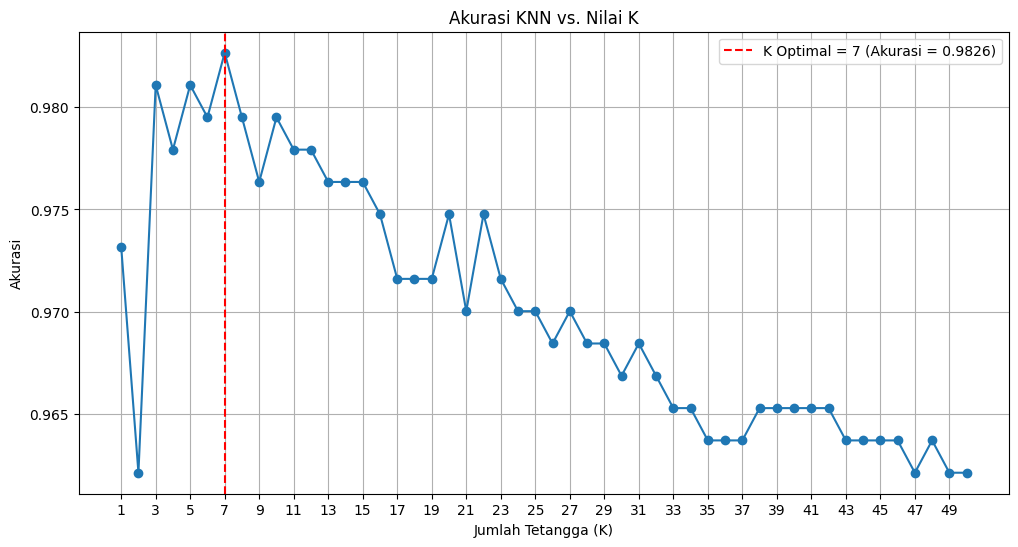

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.figure(figsize=(12, 6))
plt.plot(k_values, accuracy_scores, marker='o', linestyle='-')
plt.title('Akurasi KNN vs. Nilai K')
plt.xlabel('Jumlah Tetangga (K)')
plt.ylabel('Akurasi')
plt.xticks(np.arange(1, 51, 2)) # Menampilkan nilai K dari 1 hingga 50, setiap 2 langkah
plt.grid(True)

# Menyoroti nilai k optimal
plt.axvline(x=optimal_k, color='r', linestyle='--', label=f'K Optimal = {optimal_k} (Akurasi = {max_accuracy:.4f})')
plt.legend()
plt.show()



# Analisa Output

> Kolom 'label', yang berisi nilai 'male' dan 'female', dienkode secara numerik, dengan 'female' dipetakan ke 0 dan 'male' ke 1.

>Semua 20 fitur numerik diskalakan menggunakan StandardScaler.

>Data dibagi menjadi set pelatihan dan pengujian dengan rasio 80/20: X_train (2534 sampel, 20 fitur), X_test (634 sampel, 20 fitur), y_train (2534 sampel), dan y_test (634 sampel).

>Berdasarkan grafik di atas, dapat dilihat bagaimana akurasi model KNN berubah seiring dengan peningkatan nilai 'k'. Akurasi tertinggi, sebesar 0.9826, dicapai pada nilai 'k' = 7.

>Nilai 'k' yang lebih kecil (misalnya, k=1) cenderung terlalu sensitif terhadap noise dalam data pelatihan (overfitting), sementara nilai 'k' yang terlalu besar dapat menyebabkan model menjadi terlalu umum (underfitting) karena mempertimbangkan terlalu banyak tetangga yang mungkin tidak relevan.

>Optimal 'k' = 7 menunjukkan keseimbangan terbaik antara bias dan variansi untuk dataset ini, menghasilkan kinerja klasifikasi yang paling tinggi pada data uji.

>Fitur yang digunakan untuk mendapatkan hasil terbaik adalah semua 20 fitur numerik yang ada di dataset awal (yaitu, semua kolom kecuali 'label'), setelah dilakukan penskalaan menggunakan StandardScaler.